<a href="https://colab.research.google.com/github/rlaalswn222/kaggle-dacon-practice/blob/main/amazon_twitter_roberta_base_sentiment_latest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/df/amazon/1/'

df = pd.read_csv(path + 'amazon_reviews.csv')
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [ ]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
import torch
import numpy as np
from scipy.special import softmax

# Load model and tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Preprocessing function
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Sentiment analysis function
def analyze_sentiment(text):
    try:
        text = preprocess(str(text))
        encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

        # Top label
        ranking = np.argsort(scores)[::-1]
        top_label = config.id2label[ranking[0]]
        top_score = float(scores[ranking[0]])

        return {"label": top_label, "score": top_score}
    except Exception as e:
        return {"label": "ERROR", "score": 0.0}

# 예시 DataFrame
# df = pd.read_csv("your_reviews.csv")  # 이미 로딩된 상태라고 가정
# 감성 분석 적용
df['sentiment'] = df['reviewText'].apply(analyze_sentiment)

# 라벨과 스코어를 따로 분리하고 싶다면
df['sentiment_label'] = df['sentiment'].apply(lambda x: x['label'])
df['sentiment_score'] = df['sentiment'].apply(lambda x: x['score'])

# 필요시 출력
print(df[['reviewText', 'sentiment_label', 'sentiment_score']].head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

                                          reviewText sentiment_label  \
0                                         No issues.         neutral   
1  Purchased this for my device, it worked as adv...        positive   
2  it works as expected. I should have sprung for...         neutral   
3  This think has worked out great.Had a diff. br...        positive   
4  Bought it with Retail Packaging, arrived legit...        positive   

   sentiment_score  
0         0.623615  
1         0.906580  
2         0.521455  
3         0.934475  
4         0.887852  


In [ ]:
df['sentiment_score']

,sentiment_score
0,0.623615
1,0.906580
2,0.521455
3,0.934475
4,0.887852
...,...
4910,0.878705
4911,0.961118
4912,0.980596
4913,0.947080


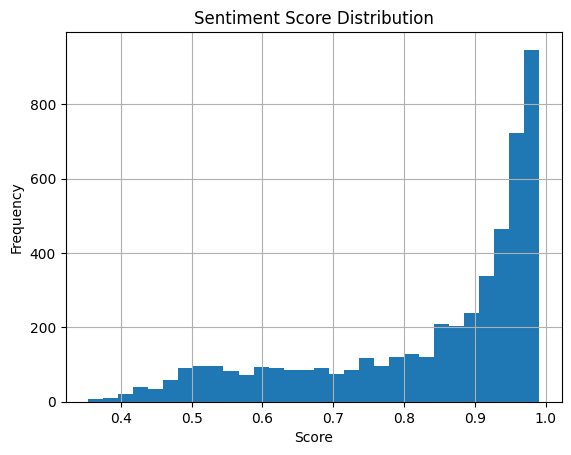

In [ ]:
df['sentiment_score'].hist(bins=30)
plt.title("Sentiment Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

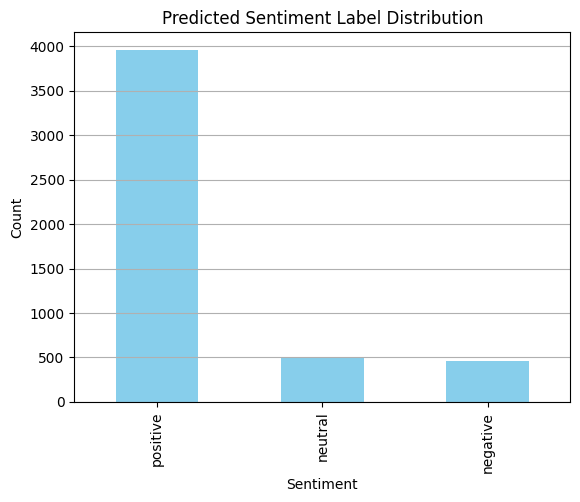

In [ ]:
import matplotlib.pyplot as plt

# 예측 라벨 분포
df['sentiment_label'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Predicted Sentiment Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions list

ref                                                                               deadline             category                reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-2     2025-04-01 23:59:00  Featured         2,117,152 Usd       2351           False  
https://www.kaggle.com/competitions/arc-prize-2025                                2025-11-03 23:59:00  Featured           725,000 Usd        120           False  
https://www.kaggle.com/competitions/stanford-rna-3d-folding                       2025-05-29 23:59:00  Featured            75,000 Usd        811           False  
https://www.kaggle.com/competitions/byu-locating-bacterial-flagellar-motors-2025  2025-06-04 23:59:00  Research            65,000 Usd        564           False  
https://www.kaggle.com

In [ ]:
!kaggle competitions submit -c amazon-nlp-sentiment-analysis -f submission.csv -m "hugging"

[Errno 2] No such file or directory: 'submission.csv'


In [ ]:
# 예: 인덱스를 id처럼 사용하고, 감성 결과는 label 컬럼으로 저장
submission = df[['reviewText', 'sentiment_label', 'sentiment_score']].copy()
submission['id'] = submission.index
submission = submission[['id', 'reviewText', 'sentiment_label', 'sentiment_score']]

# 저장
submission.to_csv('submission.csv', index=False)


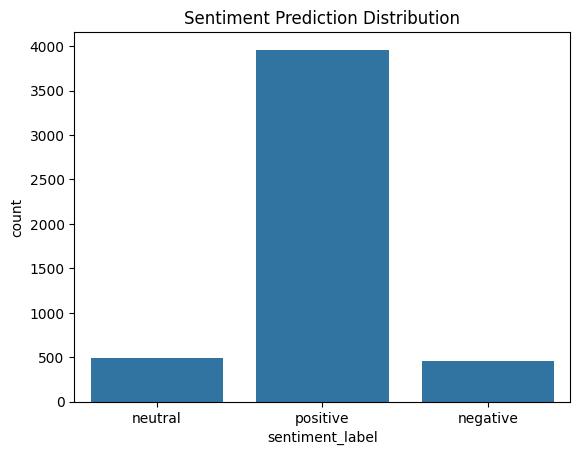

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Prediction Distribution')
plt.show()

In [ ]:
df[['overall', 'sentiment_label']].groupby('sentiment_label').mean()


,overall
sentiment_label,
negative,2.512987
neutral,4.341463
positive,4.860136


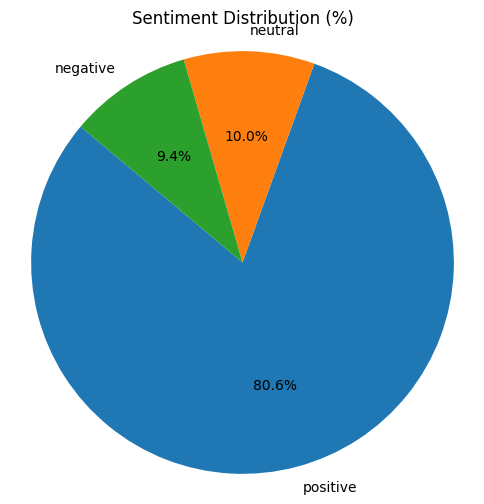

In [ ]:
import matplotlib.pyplot as plt

# 감성 비율 계산
sentiment_counts = df['sentiment_label'].value_counts(normalize=True) * 100
sentiment_counts = sentiment_counts.round(2)

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Sentiment Distribution (%)')
plt.axis('equal')
plt.show()
